In [1]:
#!pip install opencv-python

# Discrete Cosine Transform

This notebook is for the sole purpose of understanding and playing around with the discreet cosine transform

In [2]:
import sys
sys.path.append("../")

In [3]:
from src.DCT import DCT
from src.quantizer import Quantizer
from src.huffman import Huffman
from src.JPEG import JPEG
from src.run_length_code import RunLengthCode
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [4]:
basis = DCT.get_basis()
quantizer = Quantizer()


In [5]:
basis.min()

-0.9807852804032307

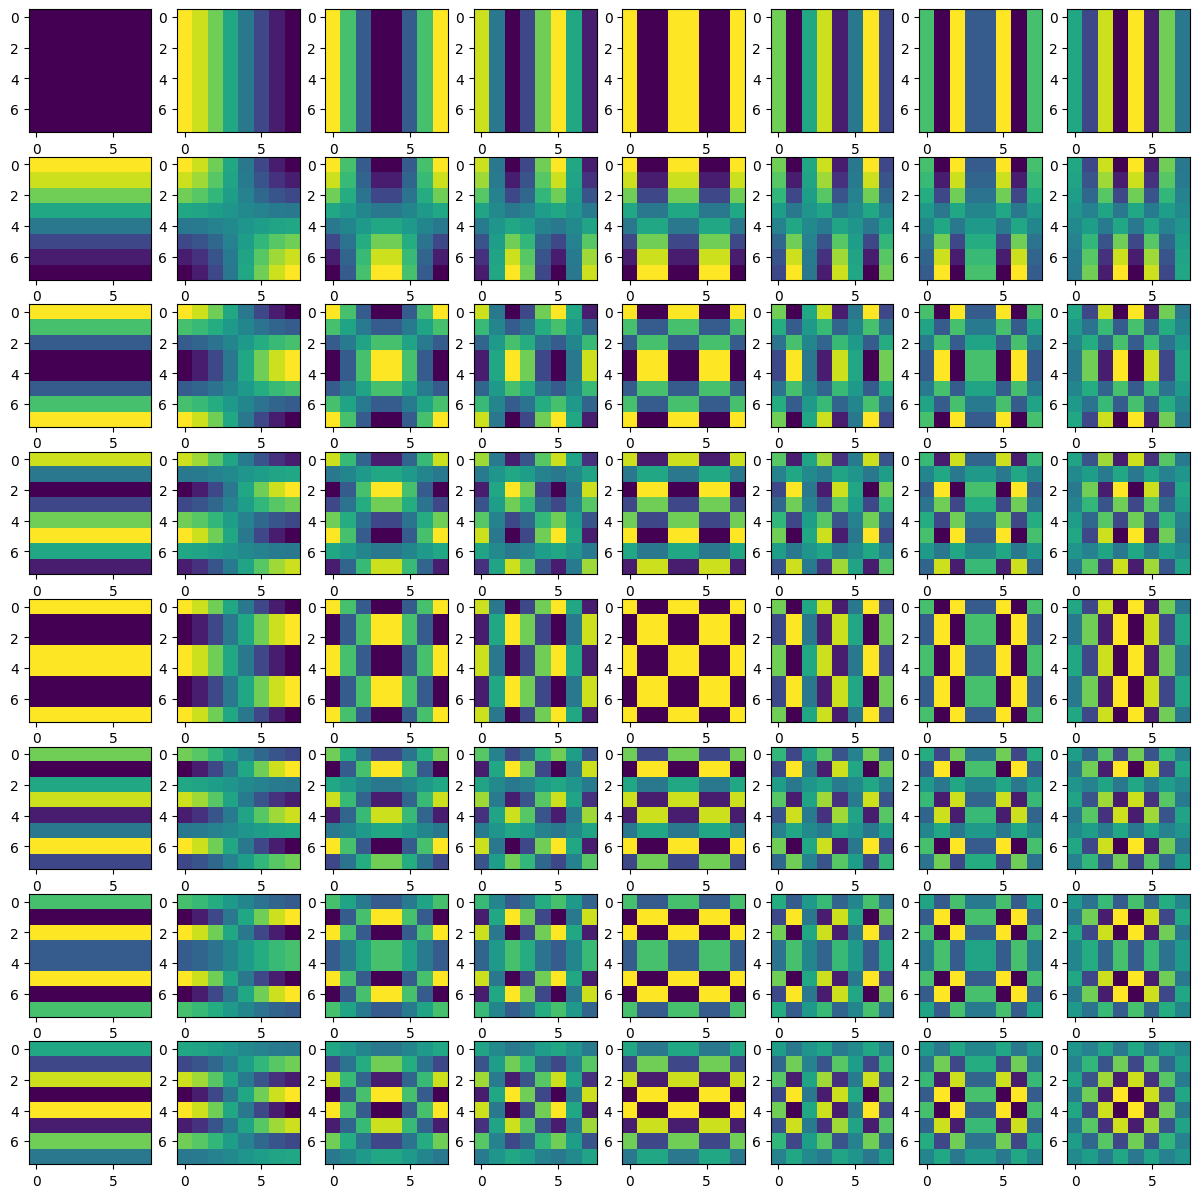

In [6]:
fig, ax = plt.subplots(8,8, figsize=(15,15))

for i in range(8):
    for j in range(8):
        ax[i, j].imshow(basis[i][j])
plt.show()

In [7]:
img = cv2.imread("B2DBy.jpg")

In [8]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [9]:
jpeg = JPEG(img_gray)

In [10]:
img_gray = jpeg.zero_padding(img_gray)

In [11]:
img_gray.min()

0.0

In [12]:
img_gray.max()

255.0

In [13]:
#img_gray = img_gray[0:296, 0:328]

In [14]:
img_gray.shape

(304, 336)

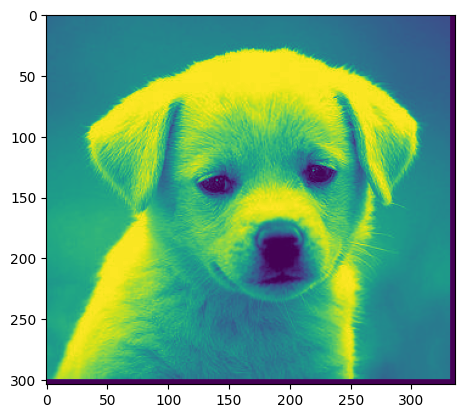

In [15]:
plt.imshow(img_gray)

In [16]:
fig_dct = DCT.DCT(img_gray)

In [17]:
fig_dct.shape

(304, 336)

In [18]:
fig_dct.min()

-153.64272728985776

In [19]:
fig_dct.max()

1020.0

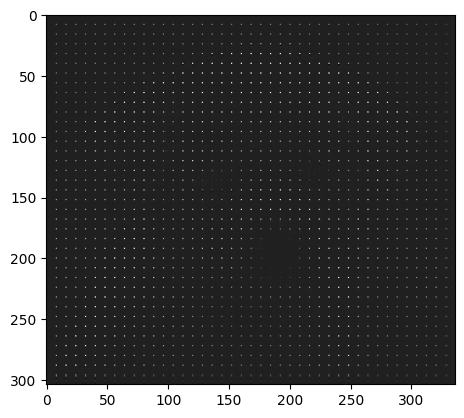

In [20]:
plt.imshow( fig_dct, cmap="gray")

In [21]:
fig_dct

array([[ 9.10000000e+01, -5.10041293e-01,  4.55535393e-01, ...,
         9.15132159e+00,  2.59695300e-02, -7.74787340e+00],
       [-1.05702092e+00, -1.49282760e-02, -1.71520841e-02, ...,
        -8.43180184e-02,  1.17290712e-02,  7.97415619e-02],
       [-8.45618906e-03,  1.95170337e-02,  3.77220869e-02, ...,
        -1.60399990e-02,  2.02014565e-02,  2.90906410e-02],
       ...,
       [ 2.49761854e+01, -2.10079828e+00,  6.73611370e-01, ...,
         2.29665090e+00,  1.43827953e-02, -1.93663720e+00],
       [ 1.67061603e-02,  3.29944130e-03,  9.99200722e-16, ...,
        -4.99600361e-16,  8.88178420e-16,  2.10942375e-15],
       [-2.11177761e+01,  1.79550440e+00, -5.71060145e-01, ...,
        -1.94700662e+00, -1.21931451e-02,  1.64180174e+00]])

In [23]:
fig_quantized = quantizer.quantization(fig_dct)
fig_quantized

array([[91,  0,  0, ...,  4,  0, -1],
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [12, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [-5,  0,  0, ...,  0,  0,  0]])

In [24]:
fig_quantized.min()

-153

In [25]:
fig_quantized.max()

1020

In [26]:
import numpy as np

In [27]:
def minmax_scaler(arr , vmin=0, vmax=1):
    arr_min, arr_max = arr.min(), arr.max()
    new_arr = ((arr - arr_min) / (arr_max - arr_min))*(vmax - vmin) + vmin
    return new_arr.astype(np.int32)


In [28]:
#fig_quantized = minmax_scaler(fig_quantized, 0, 255)
fig_quantized

array([[91,  0,  0, ...,  4,  0, -1],
       [-1,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [12, -1,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [-5,  0,  0, ...,  0,  0,  0]])

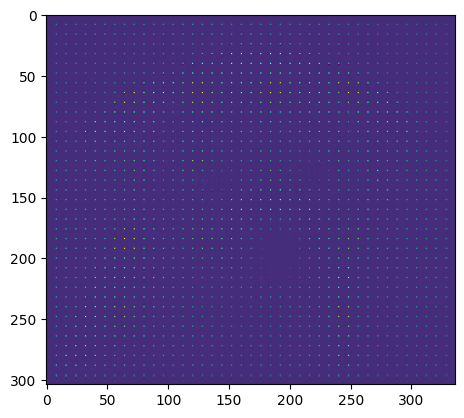

In [29]:
plt.imshow(fig_quantized)

In [30]:
fig_quantized.shape

(304, 336)

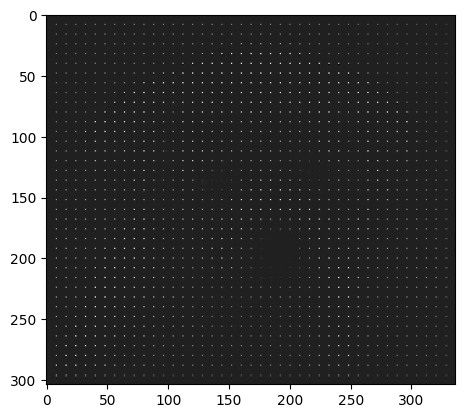

In [31]:
plt.imshow( fig_quantized, cmap="gray")

In [32]:
vector = jpeg.img2vector(fig_quantized).astype(np.int32)
vector


array([91,  0, -1, ...,  0,  0,  0])

In [33]:
vector_run_lenght = RunLengthCode.encode(vector)
vector_run_lenght

array([91.,  0.,  1., ..., -2.,  0., 21.])

In [34]:
H = Huffman(vector_run_lenght)
encoded = H.encode(vector_run_lenght)
encoded

'101000011101001011000110011111111001110111111000111011001111011101100011101100011101100111111110100000000110001110101001010110011000111100110111011100011000010101010110110100001100101110001100011001111111100111110101100011101100111111111100011001100011101100111110100001001111001011000110011111010001011010010111011001111101000101101001011000110011111010001011010010111011001111111111000110001011101010011100011001100011001101110000101110111101111000101010001111100110111000010111011001111110011011100001011000101101011110001111111111000110011000010010101010110101110111111100101110110011111111110010011010111011001111111111001001101011101100111111111100100110101110110011111111110010011010111011001111011101111111011000110001100111111110011111010010111001010101011011010001010011000100110010101010110111110100001110010111001010101011011010000000111010110001100111110100010110011010111001010101011011010000101100001011000110011110111011000110001011101100111110100011111010110011101100111110101000100

In [35]:
decoded = H.decode(encoded)
decoded

array([91.,  1., -1., ...,  1., -2., 21.])

In [36]:
r = RunLengthCode.decode(decoded)
r

array([91.,  1., -1., ...,  1., -2., 21.])

In [37]:
combine_back = jpeg.vector2img(r,fig_quantized.shape)

IndexError: index 59 is out of bounds for axis 0 with size 59

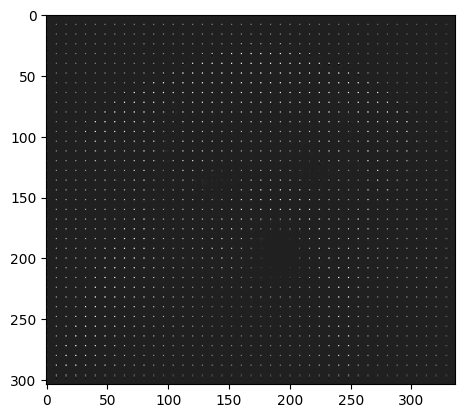

In [ ]:
plt.imshow( combine_back, cmap="gray")

In [ ]:
fig_dequantized = quantizer.reverse_Low_compression(combine_back)

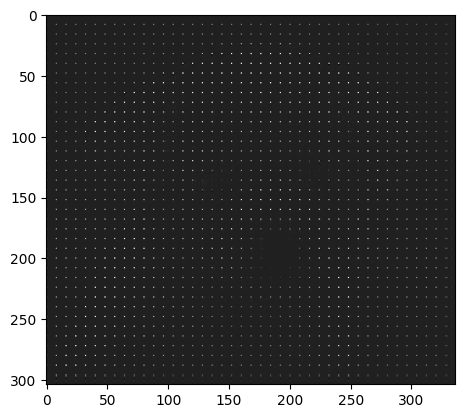

In [ ]:
plt.imshow( fig_dequantized, cmap="gray")

In [ ]:
idct = DCT.IDCT(fig_dequantized)

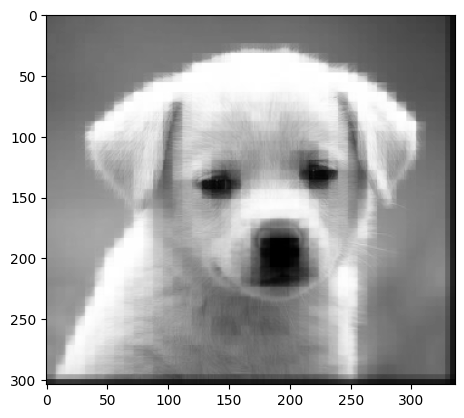

In [ ]:
plt.imshow( idct, cmap="gray")

In [ ]:
jbeg = JPEG(img_gray)

In [ ]:
compress = jbeg.compress(img_gray)

In [ ]:
decompress = jbeg.decompress(compress)

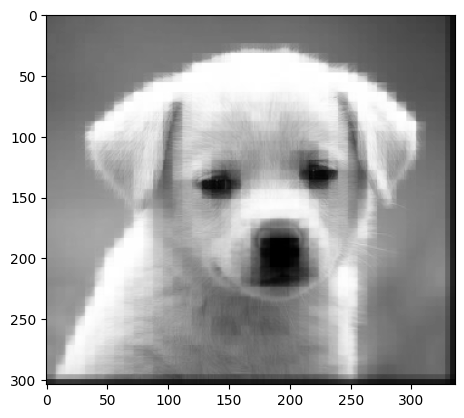

In [ ]:
plt.imshow(decompress, cmap="gray")

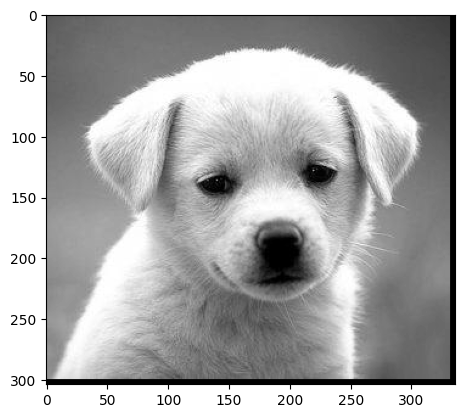

In [ ]:
plt.imshow(img_gray, cmap="gray")

In [ ]:
huffman_code_file = open("img_encoded.txt", "w") 

In [ ]:
huffman_code_file.write(encoded)

458269

In [ ]:
huffman_code_file.close()

In [ ]:
import os

In [ ]:
path = os.getcwd()+"\\"+"img_encoded.txt"

In [ ]:
file_stats = os.stat(path)
file_stats.st_size

458269

In [ ]:
path = os.getcwd()+"\\"+"B2DBy.jpg"

In [ ]:
file_stats = os.stat(path)
file_stats.st_size

13601

In [ ]:
len(encoded)

458269

In [ ]:
from sys import getsizeof

In [ ]:
getsizeof(img_gray)

817280

In [ ]:
img_gray.shape[0]*img_gray.shape[1]

102144

In [ ]:
ratio = len(encoded)/817280*100
ratio

56.07245986687549